In [356]:
import pandas as pd               
import numpy as np
import matplotlib.pyplot as plt   
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
model = linear_model.LinearRegression()
import seaborn as sns
from pandas.plotting import scatter_matrix
from scipy import stats
import statsmodels.api as sm

In [357]:
housing = pd.read_csv(r"C:\Users\Dell\Desktop\Praxis\DATASETS\PROJECT\LINEAR REGRESSION\housing.csv")


In [358]:
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [359]:
housing.shape

(1460, 81)

In [360]:
### split the data into 2 set ... one with Predicted variable ie train data and another without predicted variable ie test data

In [361]:
train = housing.loc[:,:]
train.shape

(1460, 81)

In [362]:
test =  housing.loc[:, housing.columns != 'SalePrice']
test.shape

(1460, 80)

In [363]:
# here the value I am trying to predict is Sale Price as its a dependent variable (House Price prediction) and 
# all other are independent 
## so to get info about sale price from train data
## drop the id column

In [364]:
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

C:\Users\Dell\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [365]:
train.shape


(1460, 80)

In [366]:
test.shape

(1460, 79)

In [367]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

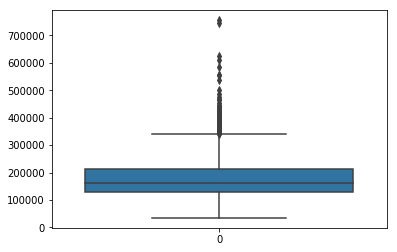

In [368]:
sns.boxplot(data =  train["SalePrice"])

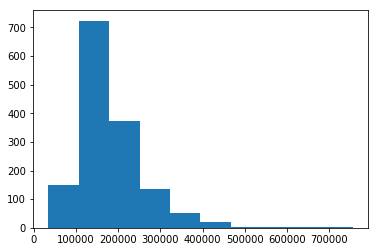

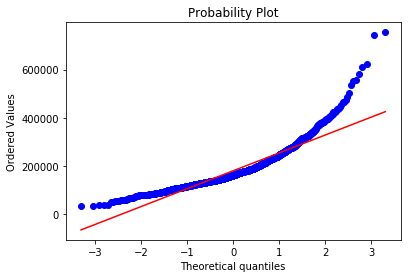

In [369]:
## to check the skewness 

plt.hist(train.SalePrice)
plt.show()
train.SalePrice.skew()

## PP PLOT

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [370]:
## As the value is not closer to 0 and by seeing graph we can say it is Positively Skewed so when we perform regression its better to log  transform the target variable to improve 
## the linearity.
## but the prediction we do also be log tranformed so we need to reverse that transformation

In [371]:
train['SalePrice'] = np.log(train.SalePrice)

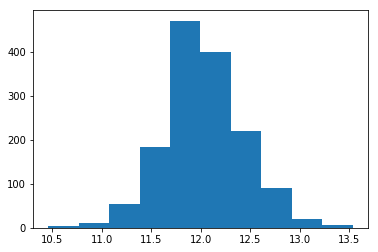

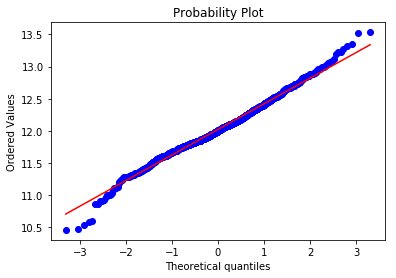

In [372]:
plt.hist(train.SalePrice)
plt.show()
train.SalePrice.skew()


#PP plot

fig = plt.figure()
stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [373]:
### Now we can see the value is near to 0 so it is Normal distribution
### Now we have to handle independent Variables for this we need to find the relation with Sale Price for this
### we will calculate correlation { correlation always calculate in numeric features so first find numeric features}
#Separate variable into new dataframe from original dataframe which has only numerical values

numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice        float64
dtype: object

In [374]:
numeric_features.shape

(1460, 37)

In [375]:
# there are 37 numerical  features from 80 attribute

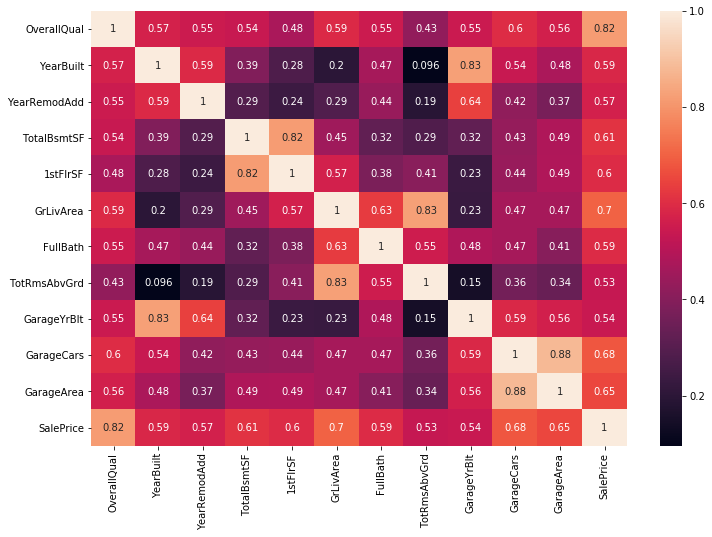

In [376]:
corr = train.corr()
top_feature = corr.index[abs(corr['SalePrice']>0.5)]
plt.subplots(figsize=(12, 8))
top_corr = train[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()

In [377]:
top_feature

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

In [378]:
#OverallQual: Rates the overall material and finish of the house (1 = Very Poor, 10 = Very Excellent)
#GrLivArea: Above grade (ground) living area square feet
#GarageCars: Size of garage in car capacity
#GarageArea: Size of garage in square feet
#TotalBsmtSF: Total square feet of basement area
#1stFlrSF: First Floor square feet
#FullBath: Full bathrooms above grade
#TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
#YearBuilt: Original construction date

##### Now see each feature with respect to saleprice

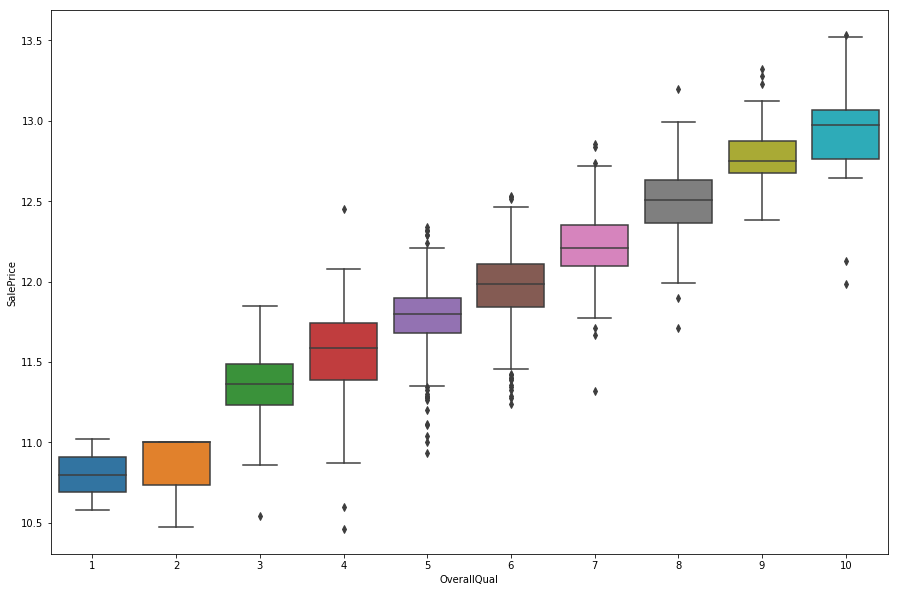

In [379]:
# Overall Quality vs Sale Price

plt.subplots(figsize=(15, 10))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

In [380]:
##### So People pay more for better quality 

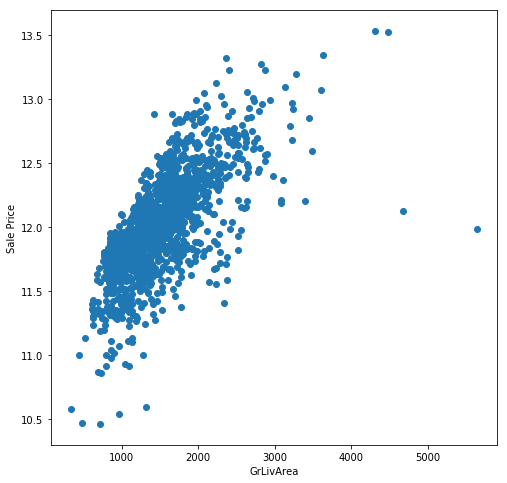

In [381]:
# Gr Living Area vs Sale Price

plt.figure(figsize=(8,8))
plt.scatter(x = train.GrLivArea , y =train.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")
plt.show()

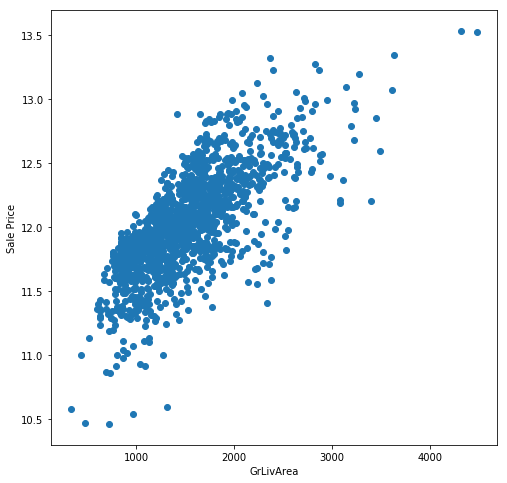

In [382]:
# People would pay for the more living area. there are outlier too 
# We need to take care of this. What we will do is remove these outliers manually.

train = train.drop(train[(train['GrLivArea']>4000) 
                         & (train['SalePrice']<12.5)].index).reset_index(drop=True)

plt.figure(figsize=(8,8))
plt.scatter(x = train.GrLivArea , y =train.SalePrice)
plt.xlabel("GrLivArea")
plt.ylabel("Sale Price")
plt.show()

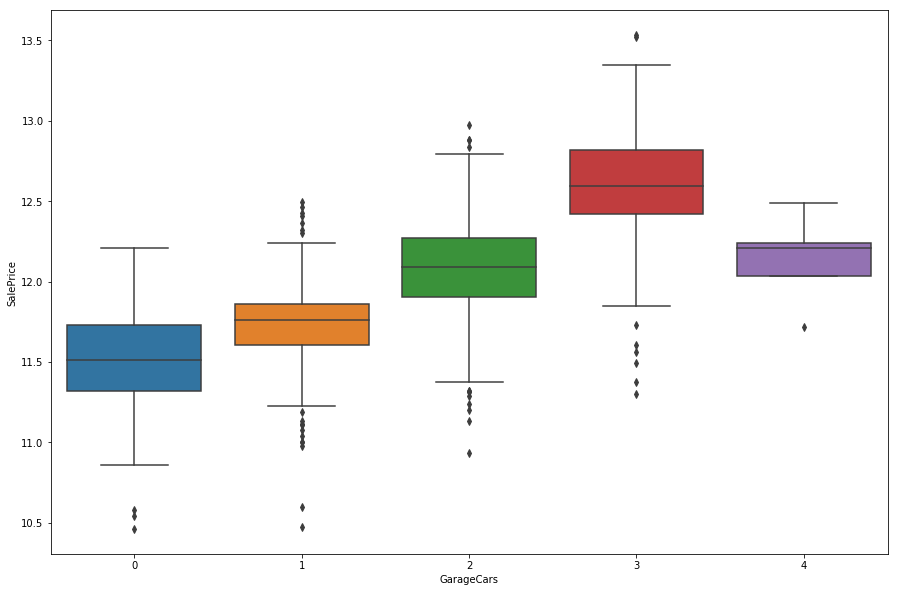

In [383]:
# Garage Cars vs Sale Price

plt.subplots(figsize=(15, 10))
sns.boxplot(x=train.GarageCars, y=train.SalePrice)


In [384]:
### 4 garage cars result in less price  so removing them

train = train.drop(train[(train['GarageCars']>3)  & (train['SalePrice']<12.5)].index).reset_index(drop=True)

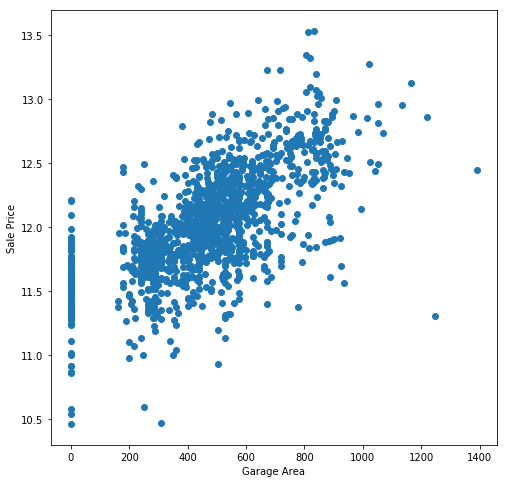

In [385]:
# Garage Area vs Sale Price

plt.figure(figsize=(8,8))
plt.scatter(x = train.GarageArea , y =train.SalePrice)
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")
plt.show()

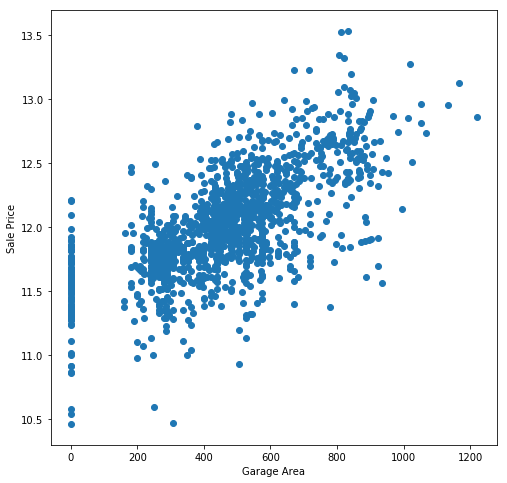

In [386]:
### there are outliers 

train = train.drop(train[(train['GarageArea']>1000) & (train['SalePrice']<12.5)].index).reset_index(drop=True)

plt.figure(figsize=(8,8))
plt.scatter(x = train.GarageArea , y =train.SalePrice)
plt.xlabel("Garage Area")
plt.ylabel("Sale Price")
plt.show()

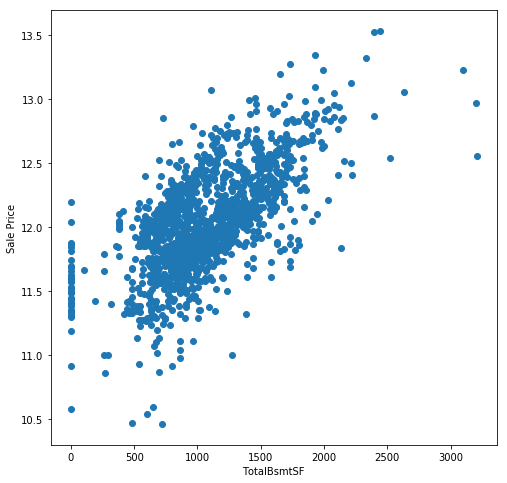

In [387]:
# Basement Area vs Sale Price

plt.figure(figsize=(8,8))
plt.scatter(x = train.TotalBsmtSF , y =train.SalePrice)
plt.xlabel("TotalBsmtSF")
plt.ylabel("Sale Price")
plt.show()

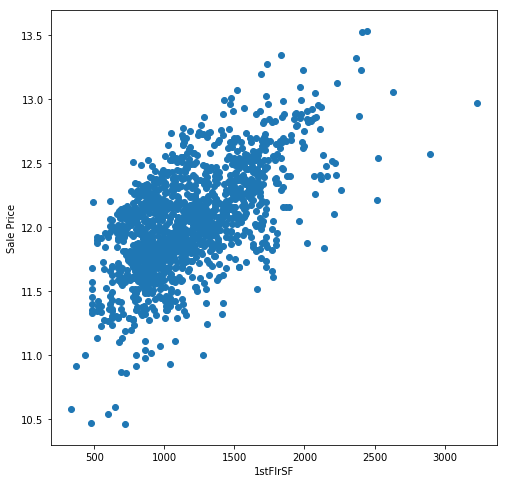

In [388]:
# First Floor Area vs Sale Price

plt.figure(figsize=(8,8))
plt.scatter(x = train["1stFlrSF"] , y =train.SalePrice)
plt.xlabel("1stFlrSF")
plt.ylabel("Sale Price")
plt.show()

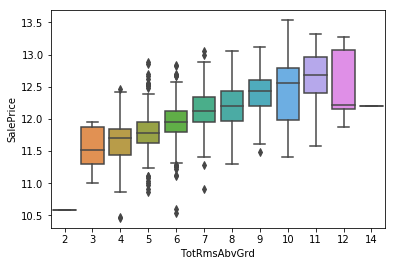

In [389]:
# Total Rooms vs Sale Price
sns.boxplot(x=train['TotRmsAbvGrd'], y=train['SalePrice'])

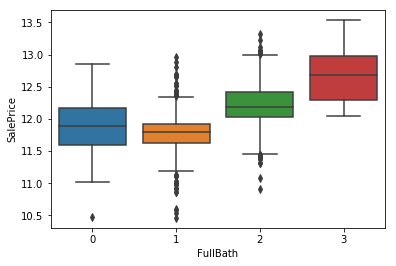

In [390]:
sns.boxplot(x=train['FullBath'], y=train['SalePrice'])

In [391]:
### as number of bathroom increase the price is also increases

In [392]:
##MISSING VALUES
missing_values = pd.DataFrame(train.isnull().sum(),columns=["missing_count"])
missing_values.head()

,missing_count
MSSubClass,0
MSZoning,0
LotFrontage,258
LotArea,0
Street,0


In [393]:
missing_values['miss_perc']=(missing_values.missing_count/train.shape[0])*100
missing_values=missing_values.sort_values(by=['miss_perc'],ascending=False)
missing_values

,missing_count,miss_perc
PoolQC,1443,99.585921
MiscFeature,1396,96.342305
Alley,1359,93.788820
Fence,1169,80.676329
FireplaceQu,686,47.342995
LotFrontage,258,17.805383
GarageYrBlt,81,5.590062
GarageCond,81,5.590062
GarageType,81,5.590062
GarageFinish,81,5.590062


<Figure size 432x288 with 0 Axes>

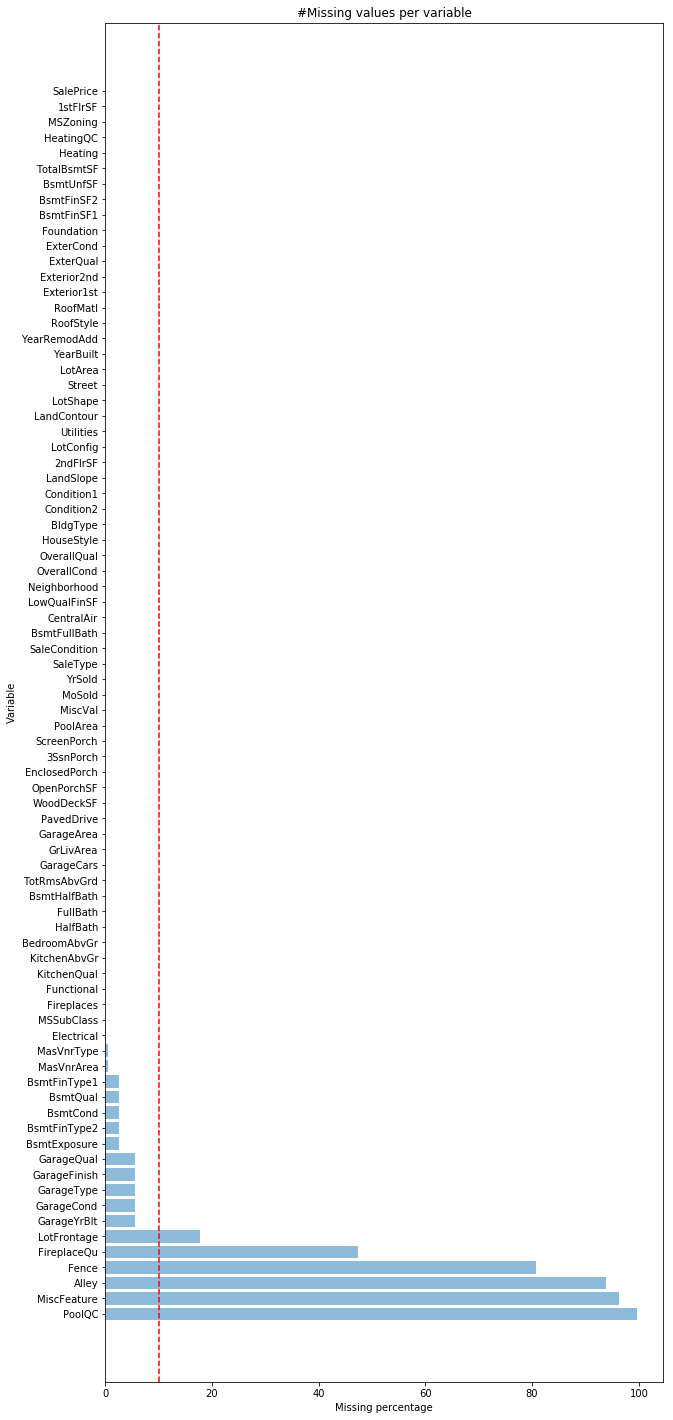

In [394]:
plt.figure()
plt.figure(figsize=(10,25))
plt.barh(missing_values.index, missing_values.miss_perc, align='center', alpha=0.5)
plt.axvline(x=10,color='r',linestyle='--')
plt.ylabel('Variable')
plt.xlabel('Missing percentage')
plt.title('#Missing values per variable')
plt.show()

In [395]:
### here we need to fill missing values in both data sets

train['PoolQC'] = train['PoolQC'].fillna('None')
train['MiscFeature'] = train['MiscFeature'].fillna('None')
train['Alley'] = train['Alley'].fillna('None')
train['Fence'] = train['Fence'].fillna('None')
train['FireplaceQu'] = train['FireplaceQu'].fillna('None')

#fill in missing value by the median LotFrontage

train['LotFrontage'].fillna((train['LotFrontage'].median()), inplace=True)

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    train[col] = train[col].fillna('None')
    
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    train[col] = train[col].fillna(int(0))
    
    
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    train[col] = train[col].fillna('None')
    
#MasVnrArea : replace with zero
train['MasVnrArea'] = train['MasVnrArea'].fillna(int(0))

#MasVnrType : replace with None
train['MasVnrType'] = train['MasVnrType'].fillna('None')


#There is put mode value 
train['Electrical'] = train['Electrical'].fillna(train['Electrical']).mode()[0]



In [396]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,None,None,None,0,2,2008,WD,Normal,12.247694
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,None,None,None,0,5,2007,WD,Normal,12.109011
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,None,None,None,0,9,2008,WD,Normal,12.317167
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,None,None,None,0,2,2006,WD,Abnorml,11.849398
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,None,None,None,0,12,2008,WD,Normal,12.429216


In [397]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [398]:
train.isnull().sum().sum()

0

In [399]:
### here we need to fill missing values in both data sets so now in test data

test['PoolQC'] = test['PoolQC'].fillna('None')
test['MiscFeature'] = test['MiscFeature'].fillna('None')
test['Alley'] = test['Alley'].fillna('None')
test['Fence'] = test['Fence'].fillna('None')
test['FireplaceQu'] = test['FireplaceQu'].fillna('None')

#fill in missing value by the median LotFrontage

test['LotFrontage'].fillna((test['LotFrontage'].median()), inplace=True)

#GarageType, GarageFinish, GarageQual and GarageCond these are replacing with None
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    test[col] = test[col].fillna('None')
    
#GarageYrBlt, GarageArea and GarageCars these are replacing with zero
for col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
    test[col] = test[col].fillna(int(0))
    
    
#BsmtFinType2, BsmtExposure, BsmtFinType1, BsmtCond, BsmtQual these are replacing with None
for col in ('BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual'):
    test[col] = test[col].fillna('None')
    
#MasVnrArea : replace with zero
test['MasVnrArea'] = test['MasVnrArea'].fillna(int(0))

#MasVnrType : replace with None
test['MasVnrType'] = test['MasVnrType'].fillna('None')


#There is put mode value 
test['Electrical'] = test['Electrical'].fillna(test['Electrical']).mode()[0]

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [400]:
test.isnull().sum().sum()

0

In [401]:
categorical_feature = train.select_dtypes(exclude= [np.number])
categorical_feature.describe()


,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449,...,1449,1449,1449,1449,1449,1449,1449,1449,1449,1449
unique,5,2,3,4,4,2,5,3,25,9,...,7,4,6,6,3,4,5,5,9,6
top,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,None,None,None,WD,Normal
freq,1145,1444,1359,917,1304,1448,1043,1372,223,1252,...,865,602,1300,1315,1330,1443,1169,1396,1261,1192


In [402]:
## count telling the count of non null values 
## unique telling number of unique values
## So we will use ONE HOT ENCODING

In [403]:
categorical_attributes=categorical_feature.columns
categorical_attributes

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [404]:
train['Bsmt'] = (train['BsmtQual'] + train['BsmtCond']) 
test['Bsmt'] = (test['BsmtQual'] + test['BsmtCond']) 

train['Garage'] = (train['GarageQual'] + train['GarageCond']) 
test['Garage'] = (test['GarageQual'] + test['GarageCond']) 

train['External'] = (train['ExterQual'] + train['ExterCond']) 
test['External'] = (test['ExterQual'] + test['ExterCond']) 

In [405]:
X_features  = train.columns
X_features

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [406]:
Xtest_features = test.columns

In [407]:
train_encoded_df = pd.get_dummies(train[X_features] , columns = categorical_attributes , drop_first = True)
test_encoded_df = pd.get_dummies(test[Xtest_features] , columns = categorical_attributes , drop_first = True)


In [408]:
#data = train_encoded_df.select_dtypes(include=[np.number]).interpolate().dropna()
#test = test_encoded_df.select_dtypes(include=[np.number]).interpolate().dropna()

In [409]:
train_encoded_df.columns


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=258)

In [410]:
y = train.SalePrice
X = data.drop(['SalePrice'], axis=1)

In [417]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [418]:
train_encoded_df.iloc[0:5:]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [419]:
# Linear Regression
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)
print('The accuracy of the Linear Regression is',r2_score(y_test,y_pred))
print ('RMSE is: \n', mean_squared_error(y_test, y_pred))

The accuracy of the Linear Regression is 0.873745965673149
RMSE is: 
 0.01645438749945163


In [420]:
#Train the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000)


In [422]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [424]:
print("Accuracy --> ", model.score(X_test, y_test)*100)

Accuracy -->  88.85170045875755
